<a href="https://colab.research.google.com/github/Paulo-fernds/Agrupamento/blob/main/RNC_para_classifica%C3%A7%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__ # !pip install tensorflow==2.6.0

'2.9.2'

# Carregamento das imagens

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
path = '/content/drive/MyDrive/Datasets/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

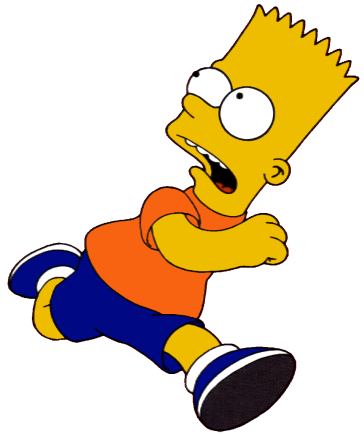

In [133]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

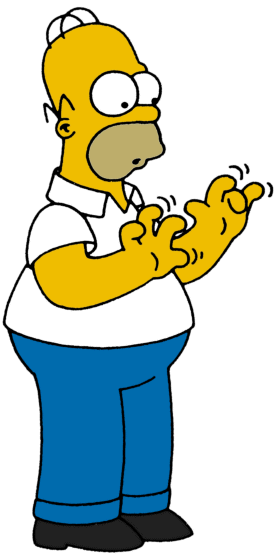

In [134]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer100.bmp')

# Bases de treinamento e teste

In [135]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [136]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/homer_bart_2/training_set',
                                                              target_size = (64, 64),
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 215 images belonging to 2 classes.


In [137]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [138]:
dataset_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [139]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/homer_bart_2/test_set',
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

Found 54 images belonging to 2 classes.


# Construção e treinamento da rede neural

In [140]:
6 * 6 * 32

1152

In [141]:
(1152 + 2) / 2

577.0

In [142]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)        

In [143]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
historico = network.fit(dataset_treinamento, epochs=15)

Epoch 1/15
27/27 [==============================] - 1s 20ms/step - loss: 0.7227 - accuracy: 0.6233
Epoch 2/15
27/27 [==============================] - 1s 22ms/step - loss: 0.5925 - accuracy: 0.6372
Epoch 3/15
27/27 [==============================] - 1s 21ms/step - loss: 0.5259 - accuracy: 0.7442
Epoch 4/15
27/27 [==============================] - 1s 21ms/step - loss: 0.4580 - accuracy: 0.8093
Epoch 5/15
27/27 [==============================] - 1s 20ms/step - loss: 0.4094 - accuracy: 0.7814
Epoch 6/15
27/27 [==============================] - 1s 20ms/step - loss: 0.3381 - accuracy: 0.8512
Epoch 7/15
27/27 [==============================] - 1s 21ms/step - loss: 0.3963 - accuracy: 0.8140
Epoch 8/15
27/27 [==============================] - 1s 21ms/step - loss: 0.3601 - accuracy: 0.8419
Epoch 9/15
27/27 [==============================] - 1s 20ms/step - loss: 0.3342 - accuracy: 0.8698
Epoch 10/15
27/27 [==============================] - 1s 21ms/step - loss: 0.2787 - accuracy: 0.8698
Epoch 11/

# Avaliação da rede neural

In [145]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [146]:
previsoes = network.predict(dataset_teste)
previsoes

54/54 [==============================] - 0s 3ms/step


array([[1.0000000e+00, 7.5236715e-09],
       [9.9999547e-01, 4.5000970e-06],
       [3.1478563e-04, 9.9968529e-01],
       [1.0000000e+00, 1.6195631e-12],
       [1.0000000e+00, 3.4044292e-10],
       [1.0000000e+00, 6.5743144e-09],
       [9.9999928e-01, 7.6580147e-07],
       [4.4566032e-02, 9.5543396e-01],
       [2.8324198e-02, 9.7167575e-01],
       [3.9675167e-01, 6.0324830e-01],
       [9.8786512e-03, 9.9012136e-01],
       [9.9999392e-01, 6.0647453e-06],
       [6.6166860e-01, 3.3833140e-01],
       [5.6642860e-01, 4.3357137e-01],
       [9.9866199e-01, 1.3379712e-03],
       [9.9999988e-01, 1.3573711e-07],
       [1.0951811e-02, 9.8904818e-01],
       [9.8394114e-01, 1.6058838e-02],
       [1.0950483e-01, 8.9049518e-01],
       [1.0000000e+00, 2.3503714e-13],
       [3.8286005e-03, 9.9617141e-01],
       [1.0000000e+00, 6.2427308e-10],
       [9.3278486e-01, 6.7215152e-02],
       [1.9112885e-02, 9.8088706e-01],
       [9.9975342e-01, 2.4658642e-04],
       [9.1986531e-01, 8.

In [147]:
previsoes = np.argmax(previsoes, axis = 0)
previsoes

array([ 0, 35])

In [148]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [149]:
# Abordagem 1 (extração de todos os pixels) - 0.72
# Abordagem 2 (extração de características) - 0.94
from sklearn.metrics import accuracy_score
#accuracy_score(dataset_teste.classes, previsoes)

In [150]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True);

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

# Salvar e carregar a rede neural

In [152]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [154]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

In [155]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_9_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_9", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_9", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [156]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [157]:
network_loaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)        

# Classificação de uma única imagem

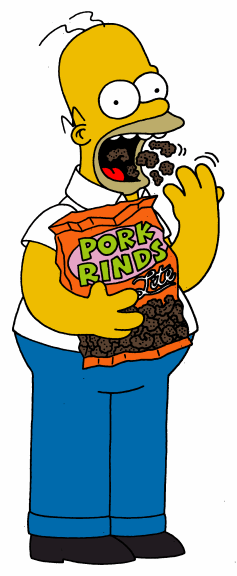

In [158]:
imagem = cv2.imread('/content/homer_bart_2/test_set/homer/homer1.bmp')
cv2_imshow(imagem)

In [159]:
imagem.shape

(576, 237, 3)

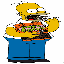

In [160]:
imagem = cv2.resize(imagem, (64, 64))
cv2_imshow(imagem)

In [161]:
imagem

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [212, 212, 212]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [162]:
imagem = imagem / 255
imagem

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

In [163]:
imagem.shape

(64, 64, 3)

In [164]:
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [165]:
previsao = network_loaded.predict(imagem)
previsao

1/1 [==============================] - 0s 71ms/step


array([[0.15556976, 0.84443027]], dtype=float32)

In [166]:
previsao = np.argmax(previsao)
previsao

1

In [167]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [168]:
if previsao == 0:
  print('Bart')
else:
  print('Homer')

Homer


In [170]:
erro = 0
acerto = 0
for i in range(3500, 3530):
  imagem = cv2.imread('/content/homer_bart_2/test_set/bart/bart.{i}.bmp')
  imagem = cv2.resize (imagem, (64, 64, 3))
  imagem = imagem / 255
  imagem = imagem.reshape(-1, 64, 64, 3)
  previsao = network_loaded.predict(imagem)
  previsao = np.argmax(previsao)
  if previsao == 0:
    erro += 1
  else:
    acerto += 1
print(f'Total = {acerto + erro} | Precisão = {acerto/(acerto + erro)}')

error: ignored